<a href="https://colab.research.google.com/github/NOUTAILAA/DATAMINING---ARTICLE/blob/main/DATAMINING_ARTICLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving articles.csv to articles.csv


TOKENISATION

1-mettre tout le texte en miniscule

2-Extraire les mots (tokenisation) : Tout ce qui n'est pas un mot (comme la ponctuation ou les espaces) est ignoré.

3-Créer une liste de mots :Le texte de chaque ligne de la colonne text est transformé en une liste de mots (appelée "tokens"),

In [ ]:
import pandas as pd
import re


# Remplacez 'articles.csv' par le nom exact du fichier que vous avez chargé
file_name = list(uploaded.keys())[0]
articles_df = pd.read_csv(file_name)

# Vérifier les premières lignes du dataset
print("Aperçu des données :")
print(articles_df.head())

# Fonction de tokenisation simple
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())  # Convertir en string pour éviter les erreurs

# Appliquer la tokenisation sur la colonne 'text'
if 'text' in articles_df.columns:
    articles_df['tokens'] = articles_df['text'].apply(simple_tokenize)
    print("\nExemple avec tokens :")
    print(articles_df[['text', 'tokens']].head())
else:
    print("La colonne 'text' est introuvable dans le dataset.")

# Enregistrer les résultats dans un nouveau fichier CSV
articles_df.to_csv("articles_with_tokens.csv", index=False)
print("\nLe fichier avec les tokens a été enregistré sous le nom 'articles_with_tokens.csv'.")


Aperçu des données :
             author claps  reading_time  \
0        Justin Lee  8.3K            11   
1       Conor Dewey  1.4K             7   
2  William Koehrsen  2.8K            11   
3      Gant Laborde  1.3K             7   
4  Emmanuel Ameisen   935            11   

                                                link  \
0  https://medium.com/swlh/chatbots-were-the-next...   
1  https://towardsdatascience.com/python-for-data...   
2  https://towardsdatascience.com/automated-featu...   
3  https://medium.freecodecamp.org/machine-learni...   
4  https://blog.insightdatascience.com/reinforcem...   

                                               title  \
0  Chatbots were the next big thing: what happene...   
1  Python for Data Science: 8 Concepts You May Ha...   
2  Automated Feature Engineering in Python – Towa...   
3  Machine Learning: how to go from Zero to Hero ...   
4  Reinforcement Learning from scratch – Insight ...   

                                              

STOP WORDS


1.   Charge et initialise l'ensemble des mots vides en anglais.
2.   La fonction remove_stopwords filtre les tokens en supprimant ceux qui appartiennent à l'ensemble des stop words.
3. Suppression des stop words via la fonction remove_stopwords :Les tokens filtrés (sans stop words) sont stockés dans une nouvelle colonne filtered_tokens.





In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Télécharger la liste des stop words (nécessaire pour la première fois)
nltk.download('stopwords')

# Charger la liste des stop words en anglais
stop_words = set(stopwords.words('english'))

# Fonction pour supprimer les stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Vérifiez si la colonne 'tokens' existe
if 'tokens' in articles_df.columns:
    # Appliquer la suppression des stop words
    articles_df['filtered_tokens'] = articles_df['tokens'].apply(remove_stopwords)
    print("\nExemple après suppression des stop words :")
    print(articles_df[['tokens', 'filtered_tokens']].head())
else:
    print("La colonne 'tokens' est introuvable dans le dataset. Assurez-vous d'avoir effectué la tokenisation.")

# Enregistrer les résultats dans un nouveau fichier CSV
articles_df.to_csv("articles_without_stopwords.csv", index=False)
print("\nLe fichier avec les stop words supprimés a été enregistré sous le nom 'articles_without_stopwords.csv'.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Exemple après suppression des stop words :
                                              tokens  \
0  [oh, how, the, headlines, blared, chatbots, we...   
1  [if, you, ve, ever, found, yourself, looking, ...   
2  [machine, learning, is, increasingly, moving, ...   
3  [if, your, understanding, of, a, i, and, machi...   
4  [want, to, learn, about, applied, artificial, ...   

                                     filtered_tokens  
0  [oh, headlines, blared, chatbots, next, big, t...  
1  [ever, found, looking, question, concept, synt...  
2  [machine, learning, increasingly, moving, hand...  
3  [understanding, machine, learning, big, questi...  
4  [want, learn, applied, artificial, intelligenc...  

Le fichier avec les stop words supprimés a été enregistré sous le nom 'articles_without_stopwords.csv'.


le stemming (réduction des mots à leur racine ou base)

La fonction apply_stemming applique le stemming à chaque mot d'une liste de tokens (réduction des mots à leur forme racine).

Si la colonne filtered_tokens existe, le stemming est appliqué sur chaque ligne, et les résultats sont stockés dans une nouvelle colonne stemmed_tokens.

Enregistrement des résultats : Enregistre le DataFrame mis à jour avec la colonne stemmed_tokens dans un fichier CSV nommé articles_with_stemming.csv.

In [ ]:
from nltk.stem import PorterStemmer

# Initialiser le stemmer
stemmer = PorterStemmer()

# Fonction pour appliquer le stemming
def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

# Vérifiez si la colonne 'filtered_tokens' existe
if 'filtered_tokens' in articles_df.columns:
    # Appliquer le stemming
    articles_df['stemmed_tokens'] = articles_df['filtered_tokens'].apply(apply_stemming)
    print("\nExemple après stemming :")
    print(articles_df[['filtered_tokens', 'stemmed_tokens']].head())
else:
    print("La colonne 'filtered_tokens' est introuvable. Assurez-vous d'avoir supprimé les stop words.")

# Enregistrer les résultats dans un nouveau fichier CSV
articles_df.to_csv("articles_with_stemming.csv", index=False)
print("\nLe fichier avec le stemming appliqué a été enregistré sous le nom 'articles_with_stemming.csv'.")



Exemple après stemming :
                                     filtered_tokens  \
0  [oh, headlines, blared, chatbots, next, big, t...   
1  [ever, found, looking, question, concept, synt...   
2  [machine, learning, increasingly, moving, hand...   
3  [understanding, machine, learning, big, questi...   
4  [want, learn, applied, artificial, intelligenc...   

                                      stemmed_tokens  
0  [oh, headlin, blare, chatbot, next, big, thing...  
1  [ever, found, look, question, concept, syntax,...  
2  [machin, learn, increasingli, move, hand, desi...  
3  [understand, machin, learn, big, question, mar...  
4  [want, learn, appli, artifici, intellig, lead,...  

Le fichier avec le stemming appliqué a été enregistré sous le nom 'articles_with_stemming.csv'.


TF IDF SANS NETTOYAGE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine tokens pour chaque article en une chaîne de texte
articles_df['processed_text'] = articles_df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialiser le TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Calculer les scores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(articles_df['processed_text'])

# Convertir la matrice TF-IDF en DataFrame pour inspection
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Afficher les premiers résultats
print("\nAperçu des scores TF-IDF :")
print(tfidf_df.head())

# Enregistrer les résultats dans un fichier CSV
tfidf_df.to_csv("tfidf_scores.csv", index=False)
print("\nLe fichier des scores TF-IDF a été enregistré sous le nom 'tfidf_scores.csv'.")



Aperçu des scores TF-IDF :
    00       000  0000  00000  0001  0002which  00061  00078  000assum  000th  \
0  0.0  0.015167   0.0    0.0   0.0        0.0    0.0    0.0       0.0    0.0   
1  0.0  0.000000   0.0    0.0   0.0        0.0    0.0    0.0       0.0    0.0   
2  0.0  0.000000   0.0    0.0   0.0        0.0    0.0    0.0       0.0    0.0   
3  0.0  0.000000   0.0    0.0   0.0        0.0    0.0    0.0       0.0    0.0   
4  0.0  0.000000   0.0    0.0   0.0        0.0    0.0    0.0       0.0    0.0   

   ...  记录一下  说实话  还是看代码比较有感觉  还是要多对照着代码看  这一阵为了工作上的关系  这个步骤并不适合各位读博士发论文的同学们  \
0  ...   0.0  0.0         0.0         0.0          0.0                   0.0   
1  ...   0.0  0.0         0.0         0.0          0.0                   0.0   
2  ...   0.0  0.0         0.0         0.0          0.0                   0.0   
3  ...   0.0  0.0         0.0         0.0          0.0                   0.0   
4  ...   0.0  0.0         0.0         0.0          0.0                   0.0   

   这

TF IDF AVEC NETTOYAGE

 Elle permet de mesurer l'importance d'un mot dans un document par rapport à un ensemble de documents.

Supprimer les caractères non alphabétiques.
Convertir tout le texte en minuscules.

Applique le vecteur TF-IDF sur la colonne cleaned_text pour créer une matrice TF-IDF.

Convertit cette matrice en un DataFrame Pandas, où :
Chaque colonne représente un mot unique (caractéristique).
Chaque ligne contient les scores TF-IDF pour un document.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
 #Elle permet de mesurer l'importance d'un mot dans un  ARTICLE par raPPORT AUX AUTRES ARTICLES

# Remplacez 'articles.csv' par le nom exact du fichier chargé
file_name = list(uploaded.keys())[0]
articles_df = pd.read_csv(file_name)

# Vérifiez les premières lignes pour valider le chargement des données
print("Aperçu des données initiales :")
print(articles_df.head())

# Étape 2 : Nettoyage supplémentaire avant TF-IDF
def clean_text(text):
    # Supprimer les caractères non alphabétiques et convertir en minuscule
    return ' '.join(re.findall(r'[a-zA-Z]+', str(text).lower()))

# Nettoyer le texte dans une nouvelle colonne
articles_df['cleaned_text'] = articles_df['text'].apply(clean_text)

# Étape 3 : Calcul des scores TF-IDF
# Initialiser le TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Calculer la matrice TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(articles_df['cleaned_text'])

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Afficher un aperçu des scores TF-IDF
print("\nAperçu des scores TF-IDF :")
print(tfidf_df.head(20))

# Étape 4 : Sauvegarder le résultat dans un fichier CSV
tfidf_df.to_csv("tfidf_scores.csv", index=False)
print("\nLe fichier des scores TF-IDF a été enregistré sous le nom 'tfidf_scores.csv'.")


Aperçu des données initiales :
             author claps  reading_time  \
0        Justin Lee  8.3K            11   
1       Conor Dewey  1.4K             7   
2  William Koehrsen  2.8K            11   
3      Gant Laborde  1.3K             7   
4  Emmanuel Ameisen   935            11   

                                                link  \
0  https://medium.com/swlh/chatbots-were-the-next...   
1  https://towardsdatascience.com/python-for-data...   
2  https://towardsdatascience.com/automated-featu...   
3  https://medium.freecodecamp.org/machine-learni...   
4  https://blog.insightdatascience.com/reinforcem...   

                                               title  \
0  Chatbots were the next big thing: what happene...   
1  Python for Data Science: 8 Concepts You May Ha...   
2  Automated Feature Engineering in Python – Towa...   
3  Machine Learning: how to go from Zero to Hero ...   
4  Reinforcement Learning from scratch – Insight ...   

                                    

**FIREFLY** pour la sélection des features sur matrice TF-IDF

sélectionner un ensemble optimal de mots (ou caractéristiques) les plus pertinents pour une analyse basée sur les scores TF-IDF


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mutual_info_score

# Charger les scores TF-IDF
tfidf_df = pd.read_csv("tfidf_scores.csv")

# Définir Paramètres de l'algorithme Firefly
num_fireflies = 10  # Nombre de solutions initiales (ou lucioles)
max_iterations = 50  # Nombre maximal d'itérations
gamma = 1  # Coefficient d'attractivité
beta0 = 1  # Attractivité initiale
alpha = 0.2  # Facteur aléatoire
num_features = 10  # Nombre de caractéristiques à sélectionner

# Fonction objectif : Mutual Information pour évaluer l'importance des features
def objective_function(selected_features, tfidf_data):
    # Calcule la somme des scores TF-IDF des features sélectionnées
    subset = tfidf_data[:, selected_features]
    importance = np.sum(subset, axis=1)
    return np.mean(importance)

# Initialiser les lucioles (solutions aléatoires)
num_words = tfidf_df.shape[1]
fireflies = [np.random.choice(range(num_words), size=num_features, replace=False) for _ in range(num_fireflies)]
tfidf_matrix = tfidf_df.to_numpy()

# Exécuter l'algorithme Firefly
for iteration in range(max_iterations):
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if i != j:
                # Calculer la luminosité (fonction objectif)
                brightness_i = objective_function(fireflies[i], tfidf_matrix)
                brightness_j = objective_function(fireflies[j], tfidf_matrix)
                if brightness_j > brightness_i:
                    # Déplacer la luciole i vers la luciole j
                    for k in range(num_features):
                        r = np.linalg.norm(fireflies[i] - fireflies[j])  # Distance entre lucioles
                        beta = beta0 * np.exp(-gamma * r**2)
                        fireflies[i][k] += beta * (fireflies[j][k] - fireflies[i][k]) + alpha * np.random.uniform()

# Sélectionner la meilleure solution
best_firefly = max(fireflies, key=lambda f: objective_function(f, tfidf_matrix))
selected_features = [tfidf_df.columns[int(idx)] for idx in best_firefly]

print("Les caractéristiques sélectionnées par l'algorithme Firefly sont :")
print(selected_features)


Les caractéristiques sélectionnées par l'algorithme Firefly sont :
['unfortunate', 'sensorimotor', 'bercy', 'drones', 'limitations', 'authentic', 'wgan', 'will', 'aujourd', 'overrepresentation']


*Chi²* sur une matrice TF-IDF

Le test Chi² est appliqué pour sélectionner les 10 caractéristiques les plus pertinentes en fonction de leur relation avec la cible. Cela permet de réduire la dimensionnalité en conservant les mots les plus informatifs.

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Charger votre fichier CSV
file_name = list(uploaded.keys())[0]
articles_df = pd.read_csv(file_name)

# Vérifiez les colonnes disponibles
print("Colonnes disponibles :", articles_df.columns)

# Étape 1 : Générer une colonne cible fictive
# Supposons que vous avez deux catégories : 0 et 1
articles_df['target'] = [0, 1] * (len(articles_df) // 2) + [0] * (len(articles_df) % 2)

# Vérifiez l'ajout de la colonne target
print("\nAperçu des données avec la colonne cible ajoutée :")
print(articles_df.head())

# Étape 2 : Convertir le texte en matrice TF-IDF
text_column = 'text'  # Colonne contenant le texte
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(articles_df[text_column])

# Étape 3 : Encodage de la variable cible
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(articles_df['target'])

# Étape 4 : Appliquer le test Chi²
chi2_selector = SelectKBest(chi2, k=10)  # Sélectionner les 10 meilleures caractéristiques
tfidf_chi2 = chi2_selector.fit_transform(tfidf_matrix, target_encoded)

# Obtenir les caractéristiques sélectionnées
selected_features = [vectorizer.get_feature_names_out()[i] for i in chi2_selector.get_support(indices=True)]

print("\nLes 10 caractéristiques les plus significatives sélectionnées par Chi² sont :")
print(selected_features)

# Étape 5 : Sauvegarder les résultats dans un fichier CSV
selected_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': chi2_selector.scores_[chi2_selector.get_support()]
})
selected_df.to_csv("selected_features_chi2.csv", index=False)
print("\nLes résultats ont été enregistrés dans 'selected_features_chi2.csv'.")


Colonnes disponibles : Index(['author', 'claps', 'reading_time', 'link', 'title', 'text'], dtype='object')

Aperçu des données avec la colonne cible ajoutée :
             author claps  reading_time  \
0        Justin Lee  8.3K            11   
1       Conor Dewey  1.4K             7   
2  William Koehrsen  2.8K            11   
3      Gant Laborde  1.3K             7   
4  Emmanuel Ameisen   935            11   

                                                link  \
0  https://medium.com/swlh/chatbots-were-the-next...   
1  https://towardsdatascience.com/python-for-data...   
2  https://towardsdatascience.com/automated-featu...   
3  https://medium.freecodecamp.org/machine-learni...   
4  https://blog.insightdatascience.com/reinforcem...   

                                               title  \
0  Chatbots were the next big thing: what happene...   
1  Python for Data Science: 8 Concepts You May Ha...   
2  Automated Feature Engineering in Python – Towa...   
3  Machine Learning: 

K-MEANS pour regrouper des articles (ou documents) en fonction de leurs similarités textuelles,


Aperçu des clusters :
                                                text  cluster
0  Oh, how the headlines blared:\nChatbots were T...        2
1  If you’ve ever found yourself looking up the s...        2
2  Machine learning is increasingly moving from h...        2
3  If your understanding of A.I. and Machine Lear...        2
4  Want to learn about applied Artificial Intelli...        0


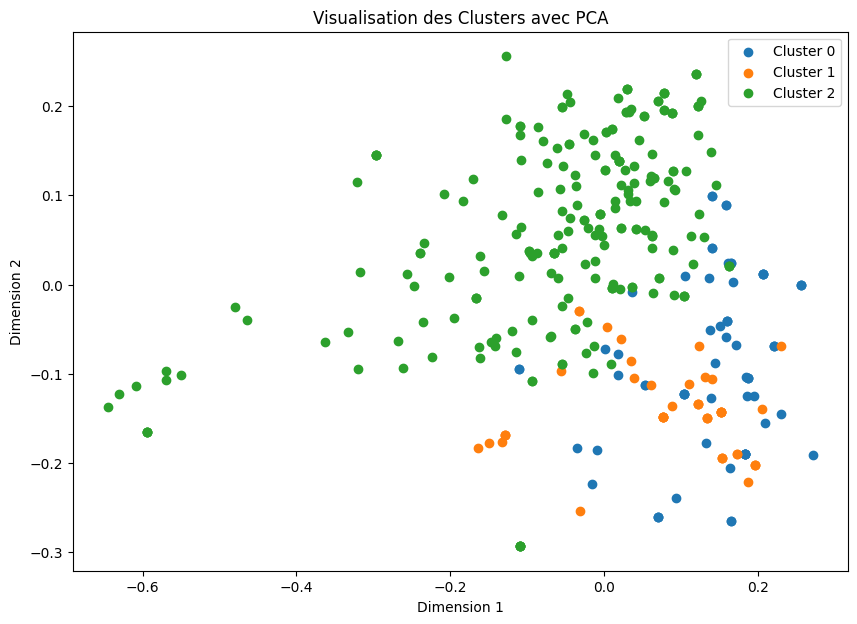


Les résultats des clusters ont été enregistrés dans 'articles_with_clusters.csv'.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Étape 5 : Appliquer K-Means pour le clustering
# Définir le nombre de clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajuster le modèle K-Means sur la matrice TF-IDF
kmeans.fit(tfidf_matrix)

# Ajouter les labels des clusters au DataFrame original
articles_df['cluster'] = kmeans.labels_

# Afficher un aperçu des articles avec leurs clusters
print("\nAperçu des clusters :")
print(articles_df[['text', 'cluster']].head())

# Étape 6 : Visualisation des clusters (optionnelle)
# Réduction de la dimension avec PCA pour visualiser les clusters
#la PCA permet de simplifier les données tout en conservant l'information essentielle.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Créer un scatter plot des clusters
#Un scatter plot est créé pour afficher les points dans l'espace réduit, avec des couleurs différentes pour chaque cluster.
plt.figure(figsize=(10, 7))
for cluster in range(k):
    cluster_points = reduced_data[articles_df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title("Visualisation des Clusters avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

# Sauvegarder les résultats des clusters dans un fichier CSV
articles_df.to_csv("articles_with_clusters.csv", index=False)
print("\nLes résultats des clusters ont été enregistrés dans 'articles_with_clusters.csv'.")


TF-IDF : Utilisé pour pondérer l'importance des mots dans les documents.


Firefly Algorithm : Sélectionne les caractéristiques les plus significatives en maximisant l'importance mutuelle entre les mots.


Chi² : Test statistique pour identifier les mots ayant une corrélation forte avec les catégories cibles.


K-Means : Clustering pour regrouper les documents en fonction de leur similarité.